[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Running Models:   0%|          | 0/4 [00:00<?, ?it/s]

CAPM Windows:   0%|          | 0/5 [00:00<?, ?it/s]

CAPM 252-day:   0%|          | 0/8 [00:00<?, ?it/s]

CAPM 504-day:   0%|          | 0/8 [00:00<?, ?it/s]

CAPM 756-day:   0%|          | 0/8 [00:00<?, ?it/s]

CAPM 1008-day:   0%|          | 0/8 [00:00<?, ?it/s]

CAPM 1260-day:   0%|          | 0/8 [00:00<?, ?it/s]

FamaFrench3 Windows:   0%|          | 0/5 [00:00<?, ?it/s]

FamaFrench3 252-day:   0%|          | 0/8 [00:00<?, ?it/s]

FamaFrench3 504-day:   0%|          | 0/8 [00:00<?, ?it/s]

FamaFrench3 756-day:   0%|          | 0/8 [00:00<?, ?it/s]

FamaFrench3 1008-day:   0%|          | 0/8 [00:00<?, ?it/s]

FamaFrench3 1260-day:   0%|          | 0/8 [00:00<?, ?it/s]

Carhart4 Windows:   0%|          | 0/5 [00:00<?, ?it/s]

Carhart4 252-day:   0%|          | 0/8 [00:00<?, ?it/s]

Carhart4 504-day:   0%|          | 0/8 [00:00<?, ?it/s]

Carhart4 756-day:   0%|          | 0/8 [00:00<?, ?it/s]

Carhart4 1008-day:   0%|          | 0/8 [00:00<?, ?it/s]

Carhart4 1260-day:   0%|          | 0/8 [00:00<?, ?it/s]

FamaFrench5 Windows:   0%|          | 0/5 [00:00<?, ?it/s]

FamaFrench5 252-day:   0%|          | 0/8 [00:00<?, ?it/s]

FamaFrench5 504-day:   0%|          | 0/8 [00:00<?, ?it/s]

FamaFrench5 756-day:   0%|          | 0/8 [00:00<?, ?it/s]

FamaFrench5 1008-day:   0%|          | 0/8 [00:00<?, ?it/s]

FamaFrench5 1260-day:   0%|          | 0/8 [00:00<?, ?it/s]

Enter the start date for backtesting performance comparison (YYYY-MM-DD): 2021-01-01

Building portfolios for CAPM...
  - Sampling Window: 12.0 months
  - Sampling Window: 24.0 months
  - Sampling Window: 36.0 months
  - Sampling Window: 48.0 months
  - Sampling Window: 60.0 months

Building portfolios for FamaFrench3...
  - Sampling Window: 12.0 months
  - Sampling Window: 24.0 months
  - Sampling Window: 36.0 months
  - Sampling Window: 48.0 months
  - Sampling Window: 60.0 months

Building portfolios for Carhart4...
  - Sampling Window: 12.0 months
  - Sampling Window: 24.0 months
  - Sampling Window: 36.0 months
  - Sampling Window: 48.0 months
  - Sampling Window: 60.0 months

Building portfolios for FamaFrench5...
  - Sampling Window: 12.0 months
  - Sampling Window: 24.0 months
  - Sampling Window: 36.0 months
  - Sampling Window: 48.0 months
  - Sampling Window: 60.0 months

Top 5 Portfolios by Total Return since:  2021-01-01 00:00:00  



,Portfolio,Total Return,Sharpe Ratio,Volatility,Num Assets
4,CAPM_1260d,6.130481,1.384264,0.334577,8
9,FamaFrench3_1260d,4.364170,1.363487,0.285198,8
3,CAPM_1008d,4.065504,1.356156,0.276066,8
14,Carhart4_1260d,4.062334,1.336878,0.280974,8
2,CAPM_756d,3.687043,1.257811,0.287381,8


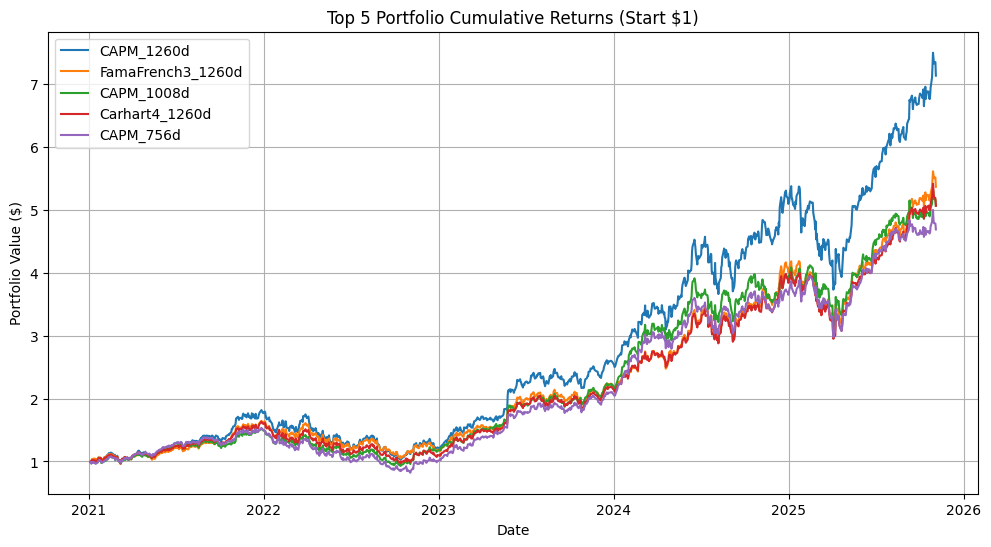


Portfolio Weights:



,CAPM_1260d,FamaFrench3_1260d,CAPM_1008d,Carhart4_1260d,CAPM_756d
AAPL,-0.018156,-0.035018,0.027084,0.029209,-0.033025
AMZN,-0.070092,-0.080476,0.007929,-0.104825,0.030213
AVGO,0.296737,0.287414,0.293057,0.267697,0.206271
GOOGL,0.131624,0.110903,0.049214,0.139130,0.091060
META,-0.001713,-0.005559,0.097528,0.134208,0.222108
MSFT,-0.015532,-0.060557,-0.046013,-0.022491,0.002614
NVDA,0.415394,0.316764,0.344662,0.252740,0.313624
TSLA,0.050752,0.103308,-0.134514,0.049700,-0.101087


In [3]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from datetime import date
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)






'''
-----------------------          Scrape Data          -----------------------
'''

today = date.today()
formatted_date = today.strftime("%Y-%m-%d")

tickers = ['NVDA', 'MSFT', 'AAPL', 'AMZN', 'GOOGL', 'META', 'TSLA', 'AVGO']   # tried using wikipedia scraper to get SMP500 companies but doesn't work due to limitations in yfinance data request limits
start = '2015-01-01'
end = formatted_date

price_data_all = yf.download(tickers, start=start, end=end)
prices = price_data_all['Close']


returns = prices.pct_change().dropna()






'''
-----------------------         Risk Free Rate         -----------------------
'''

rf = yf.download('^IRX', start=start, end=end)['Close'] / 100   # gets data for 3-year treasury bond
rf = rf / 252   # converts anualized yield to daily yield
rf = rf.reindex(returns.index).ffill()

if isinstance(rf, pd.DataFrame):   # convert dataframe to series
    rf = rf.iloc[:, 0]  # take the first column as a Series

excess_returns = returns.sub(rf, axis=0)






'''
-----------------------         Factor Returns         -----------------------
'''

factor_etfs = {   # define ETFs representing each factor
    'MKT': 'SPY',   # market
    'SMB': 'IJR',   # small-cap
    'HML_val': 'IWD',  # value
    'HML_gro': 'IWF',  # growth
    'MOM': 'MTUM',  # momentum
}

factor_prices = yf.download(list(factor_etfs.values()), start=start, end=end, auto_adjust=True)['Close']   # download daily prices
factor_returns = factor_prices.pct_change().dropna()   # compute daily returns





factors = pd.DataFrame(index=factor_returns.index)   # construct approximate factors
factors['MKT'] = factor_returns['SPY']
factors['SMB'] = factor_returns['IJR'] - factor_returns['SPY']
factors['HML'] = factor_returns['IWD'] - factor_returns['IWF']
factors['MOM'] = factor_returns['MTUM'] - factor_returns['SPY']

qual_returns = yf.download('QUAL', start=start, end=end, auto_adjust=True)['Close'].pct_change().squeeze()
v_returns = yf.download('VTV', start=start, end=end, auto_adjust=True)['Close'].pct_change().squeeze()
bk_returns = yf.download('VBK', start=start, end=end, auto_adjust=True)['Close'].pct_change().squeeze()
qual_returns = qual_returns.reindex(factors.index).fillna(method='ffill')
v_returns = v_returns.reindex(factors.index).fillna(method='ffill')
bk_returns = bk_returns.reindex(factors.index).fillna(method='ffill')

factors['RMW'] = qual_returns - factors['MKT']
factors['CMA'] = v_returns - bk_returns

factors = factors.ffill().dropna()
excess_returns = excess_returns.reindex(factors.index).dropna(how='all')

data = pd.concat([excess_returns, factors], axis=1, join='inner').dropna()   # removes any dates that doesnt exist in both datasets






'''
-----------------------           Regression           -----------------------
'''

models = {   # define factors for each model
    "CAPM": ["MKT"],
    "FamaFrench3": ["MKT", "SMB", "HML"],
    "Carhart4": ["MKT", "SMB", "HML", "MOM"],
    "FamaFrench5": ["MKT", "SMB", "HML", "RMW", "CMA"]
}

window_months = [12, 24, 36, 48, 60]
window_sizes = [m * 21 for m in window_months]  # convert months into trading days
step_size = 21

results = {}

for model_name, factor_list in tqdm(models.items(), desc="Running Models", leave=False):

    model_results = {}

    for window_size in tqdm(window_sizes, desc=f"{model_name} Windows", leave=False):

        betas, alphas, r2s, tstats, dates = {}, {}, {}, {}, {}

        for asset in tqdm(excess_returns.columns, desc=f"{model_name} {window_size}-day", leave=False):

            y_full = excess_returns[asset].dropna().iloc[-window_size:]   # take last 'window_size' days of data for this asset
            X_full = factors.loc[y_full.index, factor_list]
            X_full = sm.add_constant(X_full)

            betas[asset], alphas[asset], r2s[asset], tstats[asset], dates[asset] = [], [], [], [], []

            for start in range(0, len(y_full) - step_size + 1, step_size):   # rolling regressions across y_full with window = step_size
                end = start + step_size
                y_window = y_full.iloc[start:end]
                X_window = X_full.iloc[start:end]

                try:
                    model = sm.OLS(y_window, X_window).fit()
                    alphas[asset].append(model.params['const'])
                    betas[asset].append(model.params[factor_list])
                    r2s[asset].append(model.rsquared)
                    tstats[asset].append(model.tvalues['const'])
                    dates[asset].append(y_window.index[-1])
                except:
                    continue

        model_results[window_size] = {
            'alphas': alphas,
            'betas': betas,
            'r2s': r2s,
            'tstats': tstats,
            'dates': dates
        }

    results[model_name] = model_results






'''
------------------       Aggrigate Performance Metrics       ------------------
'''


summary_stats = []

for model_name, model_data in results.items():  # loop over models
    for window, metrics in model_data.items():  # loop over window sizes

        any_asset = next(iter(metrics['alphas']))   # determine the number of rolling periods (assuming all assets aligned)
        num_windows = len(metrics['alphas'][any_asset])
        if num_windows == 0:
            continue

        rolling_alphas = np.zeros((len(metrics['alphas']), num_windows))   # initialise arrays to collect rolling metrics across assets
        rolling_r2s = np.zeros((len(metrics['alphas']), num_windows))

        asset_list = list(metrics['alphas'].keys())
        for i, asset in enumerate(asset_list):
            alphas = np.array(metrics['alphas'][asset])
            r2s = np.array(metrics['r2s'][asset])

            if len(alphas) < num_windows:   # if asset has fewer windows, pad with NaN
                alphas = np.pad(alphas, (0, num_windows - len(alphas)), constant_values=np.nan)
                r2s = np.pad(r2s, (0, num_windows - len(r2s)), constant_values=np.nan)

            rolling_alphas[i, :] = alphas
            rolling_r2s[i, :] = r2s

        mean_alpha_per_window = np.nanmean(rolling_alphas, axis=0)   # compute metrics per rolling window across assets
        std_alpha_per_window = np.nanstd(rolling_alphas, axis=0, ddof=1)
        t_alpha_per_window = np.where(std_alpha_per_window > 0,
                                      mean_alpha_per_window / (std_alpha_per_window / np.sqrt(len(asset_list))),
                                      np.nan)
        mean_r2_per_window = np.nanmean(rolling_r2s, axis=0)

        vols = []   # volatility & sharpe across assets
        sharpes = []
        for asset in asset_list:
            if asset in excess_returns.columns:
                ret = excess_returns[asset]
                vol = ret.std()
                mean_ret = ret.mean()
                sharpe = mean_ret / vol if vol > 0 else np.nan
                vols.append(vol)
                sharpes.append(sharpe)

        avg_vol = np.nanmean(vols)
        avg_sharpe = np.nanmean(sharpes)

        summary_stats.append({
            'Model': model_name,
            'Window (days)': window,
            'Mean Alpha': np.nanmean(mean_alpha_per_window),
            't(Alpha)': np.nanmean(t_alpha_per_window),
            'Mean R²': np.nanmean(mean_r2_per_window),
            'Avg Volatility': avg_vol,
            'Avg Sharpe': avg_sharpe,
            'Num Assets': len(asset_list)
        })

summary_df = pd.DataFrame(summary_stats)






'''
---------------------       Portfolio Construction       ---------------------
'''


user_start = input("Enter the start date for backtesting performance comparison (YYYY-MM-DD): ")   # timeframe to backtest portfolios over
user_start = pd.to_datetime(user_start)

portfolio_returns = {}
portfolio_stats = []

for model_name, model_data in results.items():   # loop over each model
    print(f"\nBuilding portfolios for {model_name}...")
    for window, metrics in model_data.items():   # loop over each window
        print(f"  - Sampling Window: {window/21} months")

        mean_alphas = {   # mean alpha for each asset
            asset: np.mean(metrics['alphas'][asset])
            for asset in metrics['alphas']
            if len(metrics['alphas'][asset]) > 0
        }
        if len(mean_alphas) == 0:
            continue

        abs_sum = np.sum(np.abs(list(mean_alphas.values())))   #normalizing weights (to give proper portfolio asset weightings)
        weights = {asset: alpha / abs_sum for asset, alpha in mean_alphas.items()}

        common_assets = list(set(weights.keys()).intersection(excess_returns.columns))
        if not common_assets:
            continue
        sub_returns = excess_returns[common_assets]

        port_ret = (sub_returns * pd.Series(weights)).sum(axis=1)   # multiply return of asset by its weight to get portfolio return for that asset
        port_name = f"{model_name}_{window}d"
        portfolio_returns[port_name] = port_ret

        port_ret_window = port_ret.loc[port_ret.index >= user_start]   # statistics for defined backtesting window
        if len(port_ret_window) == 0:
            continue

        cumulative = (1 + port_ret_window).cumprod()
        total_return = cumulative.iloc[-1] - 1
        sharpe = np.sqrt(252) * port_ret_window.mean() / port_ret_window.std() if port_ret_window.std() > 0 else np.nan
        vol = np.sqrt(252) * port_ret_window.std()

        portfolio_stats.append({
            "Portfolio": port_name,
            "Total Return": total_return,
            "Sharpe Ratio": sharpe,
            "Volatility": vol,
            "Num Assets": len(weights)
        })

portfolio_stats_df = pd.DataFrame(portfolio_stats).sort_values(by="Total Return", ascending=False)   # create a summary dataframe and get top 5
top5 = portfolio_stats_df.head(5)
print("\nTop 5 Portfolios by Total Return since: ", user_start, " \n")
display(top5)

plt.figure(figsize=(12, 6))   # plot top 5 portfolio returns
for port_name in top5["Portfolio"]:
    port_ret_window = portfolio_returns[port_name].loc[portfolio_returns[port_name].index >= user_start]    # slice to user-defined timeframe
    cum = (1 + port_ret_window).cumprod()
    plt.plot(cum.index, cum, label=port_name)

plt.title(f"Top 5 Portfolio Cumulative Returns (Start $1)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)
plt.show()

top5_weights = {}   # display top 5 portfolio weights
for port_name in top5["Portfolio"]:
    model_name, window = port_name.split("_")
    window = int(window.replace("d", ""))
    metrics = results[model_name][window]
    mean_alphas = {
        asset: np.mean(metrics["alphas"][asset])
        for asset in metrics["alphas"]
        if len(metrics["alphas"][asset]) > 0
    }
    abs_sum = np.sum(np.abs(list(mean_alphas.values())))
    weights = {asset: alpha / abs_sum for asset, alpha in mean_alphas.items()}
    top5_weights[port_name] = weights

weights_df = pd.DataFrame(top5_weights).fillna(0)
print("\nPortfolio Weights:\n")
display(weights_df)